[House Price Dataset](https://www.kaggle.com/datasets/harishkumardatalab/housing-price-prediction/code)

In [2]:
import shutil
import os
import kagglehub

# Download latest version
path = kagglehub.dataset_download("harishkumardatalab/housing-price-prediction")
print("Path to dataset files:", path)

# Create Folder
destination = "/content/housing-price-prediction"
os.makedirs(destination, exist_ok=True)

# Copy entire folder
shutil.copytree("/kaggle/input/housing-price-prediction", destination, dirs_exist_ok=True)
print("Move to:", destination)

Using Colab cache for faster access to the 'housing-price-prediction' dataset.
Path to dataset files: /kaggle/input/housing-price-prediction
Move to: /content/housing-price-prediction


In [3]:
import pandas as pd

# Load dataset
data = pd.read_csv("/content/housing-price-prediction/Housing.csv")
print(data.head())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None


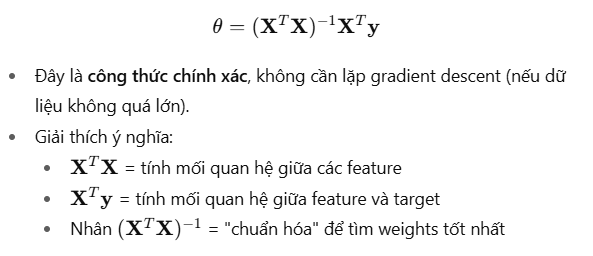

**Giải thích:**  
Linear Regression chỉ làm việc với dữ liệu số. Các cột dạng `object` (như yes/no hoặc category) cần được chuyển sang số để mô hình có thể tính toán được weights và dự đoán giá trị `price`.


**Giải thích:**  
Vì `furnishingstatus` có nhiều hơn 2 category, ta dùng one-hot encoding để chuyển mỗi category thành cột số riêng, giúp Linear Regression xử lý tất cả category mà vẫn giữ thông tin đầy đủ.


In [5]:
import pandas as pd
import numpy as np

# Chuyển yes/no thành 1/0
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for col in binary_cols:
    data[col] = data[col].map({'yes': 1, 'no': 0})

# One-hot encode cho 'furnishingstatus'
data = pd.get_dummies(data, columns=['furnishingstatus'], drop_first=True)

# Tìm tất cả cột dummy (bool) và chuyển sang int
bool_cols = data.select_dtypes(include='bool').columns
data[bool_cols] = data[bool_cols].astype(int)

# Kiểm tra lại
print(data.head())

      price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3         1          0   
1  12250000  8960         4          4        4         1          0   
2  12250000  9960         3          2        2         1          0   
3  12215000  7500         4          2        2         1          0   
4  11410000  7420         4          1        2         1          1   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1        2         1   
1         0                0                1        3         0   
2         1                0                0        2         1   
3         1                0                1        3         1   
4         1                0                1        2         0   

   furnishingstatus_semi-furnished  furnishingstatus_unfurnished  
0                                0                             0  
1                       

**Giải thích:**  
Cột toàn 1 được thêm vào X để Linear Regression học được bias (θ₀), tức intercept của đường hồi quy.


In [6]:
# Chọn target là Price so với các features còn lại
X = data.drop('price', axis=1).values
y = data['price'].values

# Thêm bias term
X_b = np.c_[np.ones((X.shape[0], 1)), X]

In [7]:
print(data.head())

      price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3         1          0   
1  12250000  8960         4          4        4         1          0   
2  12250000  9960         3          2        2         1          0   
3  12215000  7500         4          2        2         1          0   
4  11410000  7420         4          1        2         1          1   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1        2         1   
1         0                0                1        3         0   
2         1                0                0        2         1   
3         1                0                1        3         1   
4         1                0                1        2         0   

   furnishingstatus_semi-furnished  furnishingstatus_unfurnished  
0                                0                             0  
1                       

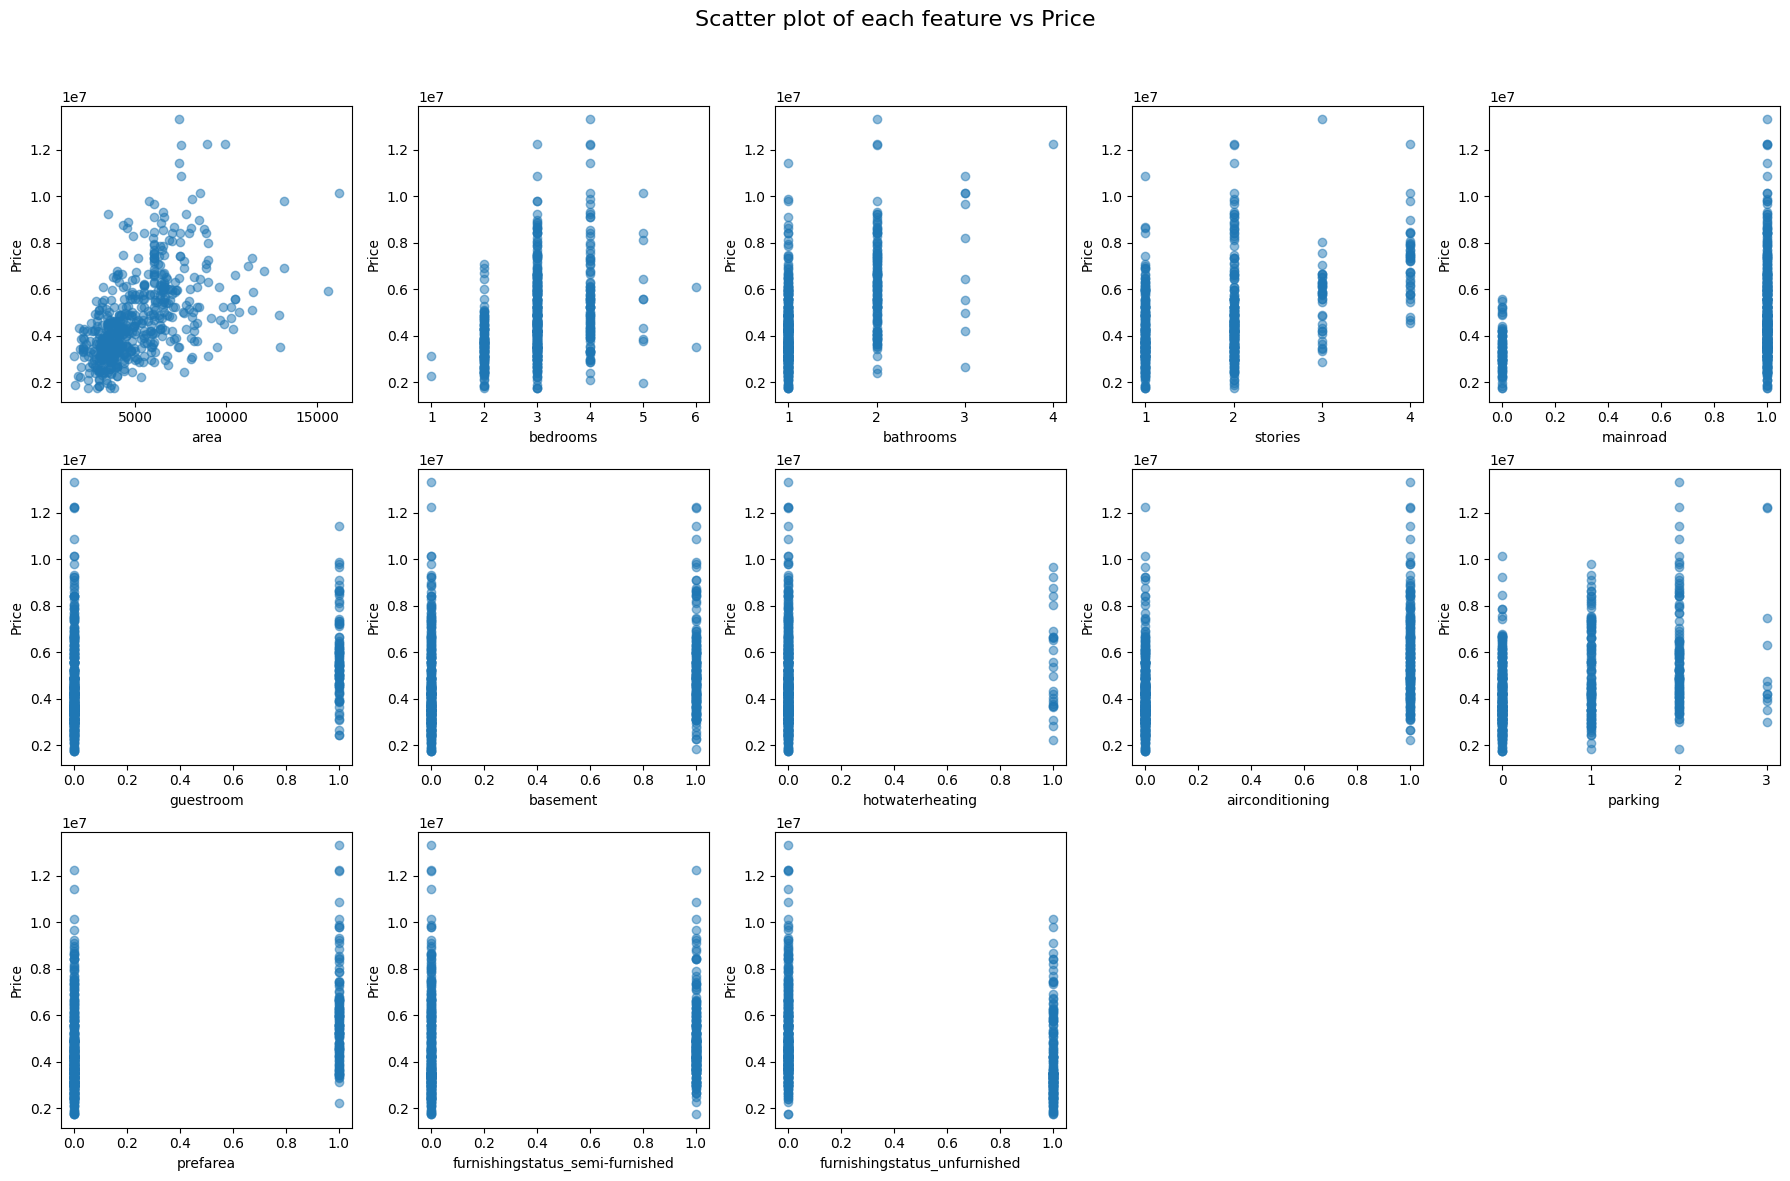

In [8]:
import matplotlib.pyplot as plt

# Lấy tên các feature (bỏ cột price)
feature_names = data.drop('price', axis=1).columns

plt.figure(figsize=(18,12))  # tùy chỉnh kích thước figure

for i, feature in enumerate(feature_names):
    plt.subplot(3, 5, i+1)  # chia figure thành 3 hàng 5 cột
    plt.scatter(data[feature], data['price'], alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.tight_layout()

plt.suptitle("Scatter plot of each feature vs Price", fontsize=16)
plt.subplots_adjust(top=0.9)  # để tiêu đề không bị đè
plt.show()

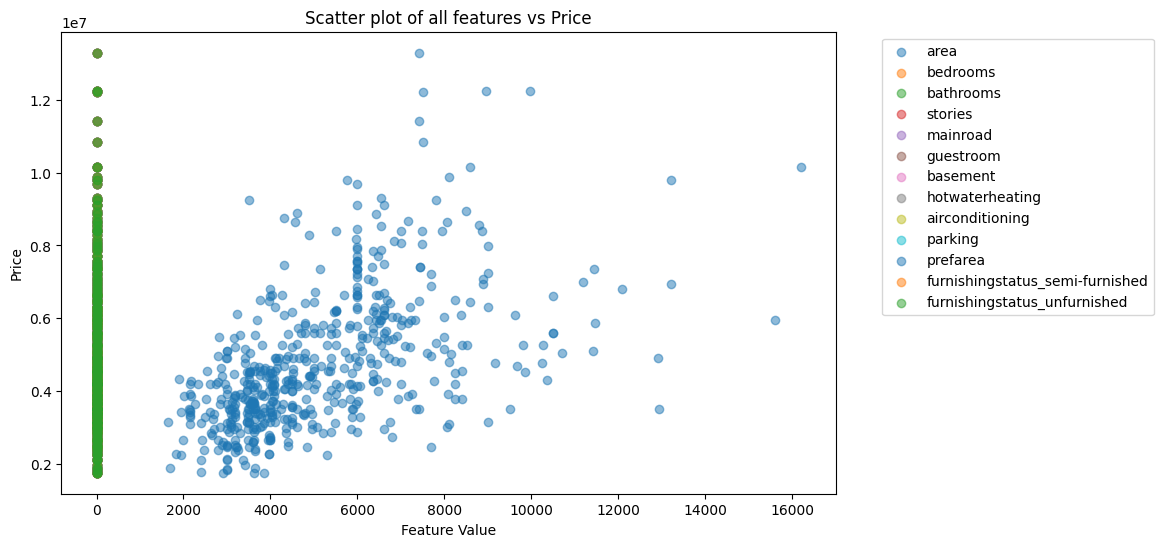

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

feature_names = data.drop('price', axis=1).columns

for feature in feature_names:
    plt.scatter(data[feature], data['price'], alpha=0.5, label=feature)

plt.xlabel('Feature Value')
plt.ylabel('Price')
plt.title('Scatter plot of all features vs Price')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # hiện legend bên phải
plt.show()


In [10]:
import numpy as np

# X_b: ma trận feature đã thêm bias
# y: target (price)

# Tính theta bằng Normal Equation
theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

print("Weights (theta):")
for i, col in enumerate(['bias'] + list(data.drop('price', axis=1).columns)):
    print(f"{col}: {theta[i]}")

Weights (theta):
bias: 42771.693918098674
area: 244.13938627175244
bedrooms: 114787.56018468786
bathrooms: 987668.1072860276
stories: 450848.0028590417
mainroad: 421272.588725606
guestroom: 300525.85963610216
basement: 350106.90413615806
hotwaterheating: 855447.1453970394
airconditioning: 864958.3113174667
parking: 277107.1013421587
prefarea: 651543.7998630085
furnishingstatus_semi-furnished: -46344.61997996912
furnishingstatus_unfurnished: -411234.3861571659


In [11]:
from sklearn.linear_model import LinearRegression

X = data.drop('price', axis=1)
y = data['price']

model = LinearRegression()
model.fit(X, y)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Coefficients: [ 2.44139386e+02  1.14787560e+05  9.87668107e+05  4.50848003e+05
  4.21272589e+05  3.00525860e+05  3.50106904e+05  8.55447145e+05
  8.64958311e+05  2.77107101e+05  6.51543800e+05 -4.63446200e+04
 -4.11234386e+05]
Intercept: 42771.6939181108


In [12]:
# Lấy tên các feature
feature_names = ['bias'] + list(data.drop('price', axis=1).columns)

# In ra equation
equation = "Price = "
for i, col in enumerate(feature_names):
    coef = theta[i]
    if i == 0:
        equation += f"{coef:.2f}"
    else:
        equation += f" + ({coef:.2f} * {col})"

print("Linear Regression Equation:")
print(equation)

Linear Regression Equation:
Price = 42771.69 + (244.14 * area) + (114787.56 * bedrooms) + (987668.11 * bathrooms) + (450848.00 * stories) + (421272.59 * mainroad) + (300525.86 * guestroom) + (350106.90 * basement) + (855447.15 * hotwaterheating) + (864958.31 * airconditioning) + (277107.10 * parking) + (651543.80 * prefarea) + (-46344.62 * furnishingstatus_semi-furnished) + (-411234.39 * furnishingstatus_unfurnished)


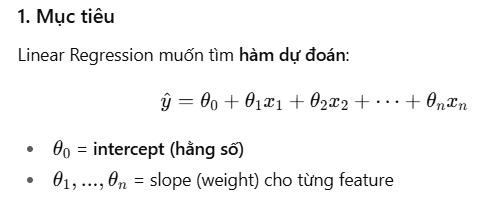

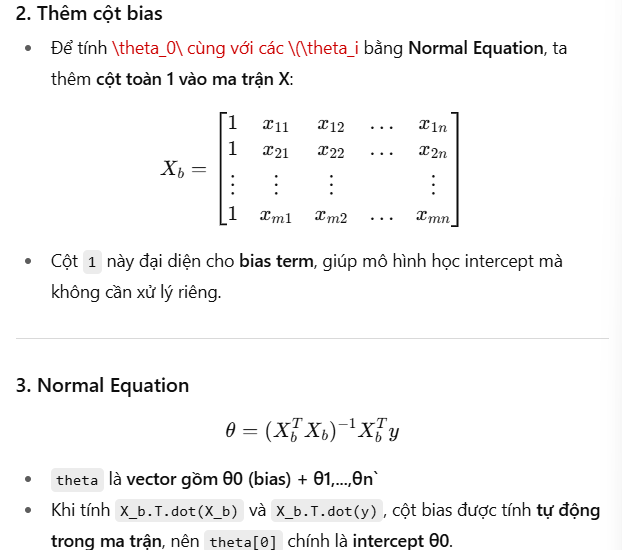

In [13]:
# In danh sách các feature và index của nó trong X_b
features = ['bias'] + list(data.drop('price', axis=1).columns)

print("Danh sách feature và index:")
for i, col in enumerate(features):
    print(f"{i}: {col}")

Danh sách feature và index:
0: bias
1: area
2: bedrooms
3: bathrooms
4: stories
5: mainroad
6: guestroom
7: basement
8: hotwaterheating
9: airconditioning
10: parking
11: prefarea
12: furnishingstatus_semi-furnished
13: furnishingstatus_unfurnished


## 🔹 2D vs 3D trong Linear Regression

- **2D plot**: chỉ biểu diễn được mối quan hệ giữa `Price` và **1 feature** (ví dụ `Area`).  
  👉 Cho ra **đường hồi quy**.  

- **3D plot**: biểu diễn `Price` theo **2 feature** (ví dụ `Area` và `Bedrooms`).  
  👉 Cho ra **mặt phẳng hồi quy**.  

- Với nhiều feature (>2), không thể trực quan hóa trực tiếp → chỉ phân tích hệ số.  


In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Feature: area
X_area = data['area'].values
y = data['price'].values

# Thêm bias để fit bằng Normal Equation
X_b = np.c_[np.ones(len(X_area)), X_area]
theta_simple = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

bias_manual = theta_simple[0]
coef_manual = theta_simple[1]

In [15]:
from sklearn.linear_model import LinearRegression

X_area_2D = X_area.reshape(-1, 1)
model = LinearRegression()
model.fit(X_area_2D, y)

bias_sklearn = model.intercept_
coef_sklearn = model.coef_[0]

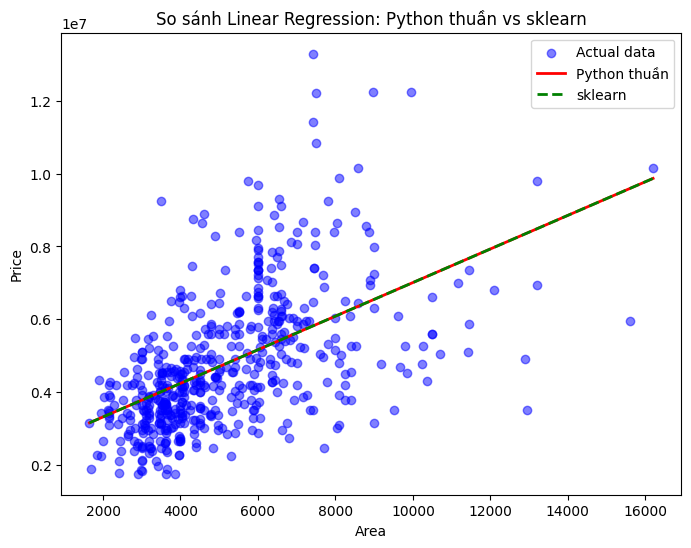

Python thuần -> Bias: 2387308.4823964285 Coef: 461.9748942727837
sklearn      -> Bias: 2387308.48239643 Coef: 461.97489427278344


In [16]:
# Trục X cho đường hồi quy
x_line = np.linspace(X_area.min(), X_area.max(), 100)

# Dự đoán từ mô hình thuần python
y_line_manual = bias_manual + coef_manual * x_line

# Dự đoán từ sklearn
y_line_sklearn = bias_sklearn + coef_sklearn * x_line

# Vẽ scatter
plt.figure(figsize=(8,6))
plt.scatter(X_area, y, color="blue", alpha=0.5, label="Actual data")

# Vẽ 2 đường hồi quy
plt.plot(x_line, y_line_manual, color="red", linewidth=2, label="Python thuần")
plt.plot(x_line, y_line_sklearn, color="green", linestyle="--", linewidth=2, label="sklearn")

plt.xlabel("Area")
plt.ylabel("Price")
plt.title("So sánh Linear Regression: Python thuần vs sklearn")
plt.legend()
plt.show()

print("Python thuần -> Bias:", bias_manual, "Coef:", coef_manual)
print("sklearn      -> Bias:", bias_sklearn, "Coef:", coef_sklearn)

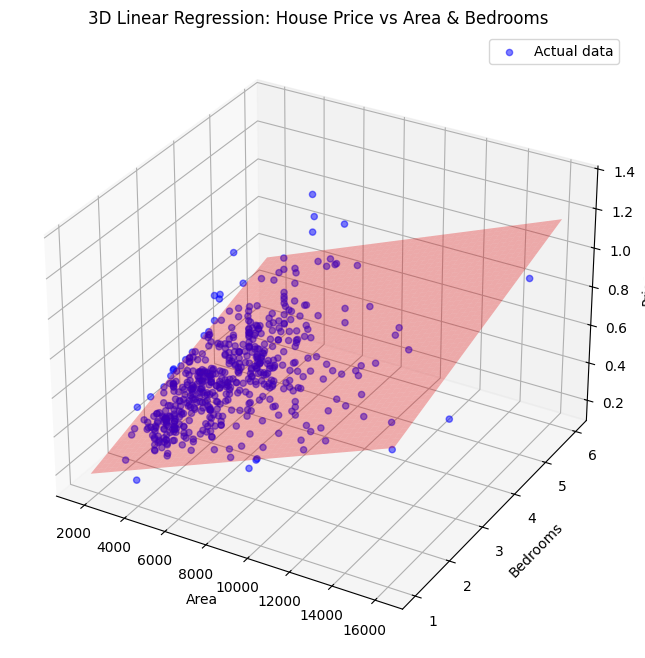

In [17]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from sklearn.linear_model import LinearRegression

# Chọn 2 feature
X = data[['area', 'bedrooms']].values
y = data['price'].values

# Train Linear Regression
model = LinearRegression()
model.fit(X, y)

# Tạo lưới điểm để vẽ mặt phẳng hồi quy
x_surf, y_surf = np.meshgrid(
    np.linspace(X[:,0].min(), X[:,0].max(), 50),
    np.linspace(X[:,1].min(), X[:,1].max(), 50)
)
z_surf = model.intercept_ + model.coef_[0]*x_surf + model.coef_[1]*y_surf

# Vẽ 3D scatter + plane
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

# Scatter dữ liệu thực
ax.scatter(X[:,0], X[:,1], y, c='blue', marker='o', alpha=0.5, label="Actual data")

# Surface của model
ax.plot_surface(x_surf, y_surf, z_surf, color='red', alpha=0.3)

ax.set_xlabel("Area")
ax.set_ylabel("Bedrooms")
ax.set_zlabel("Price")
ax.set_title("3D Linear Regression: House Price vs Area & Bedrooms")
plt.legend()
plt.show()

In [18]:
import numpy as np

features = ['bias'] + list(data.drop('price', axis=1).columns)

# Hàm dự đoán giá
def predict_price(feature_values):
    """
    feature_values: dict chứa giá trị các feature
    """
    x = np.array([1] + [feature_values.get(col, 0) for col in features[1:]])  # thêm bias = 1
    return x.dot(theta)

# Ví dụ 2 trường hợp
case1 = {
    "area": 4000,
    "bedrooms": 3,
    "bathrooms": 2,
    "stories": 2,
    "mainroad": 1,
    "guestroom": 0,
    "basement": 1,
    "hotwaterheating": 0,
    "airconditioning": 1,
    "parking": 2,
    "prefarea": 1,
    "furnishingstatus_semi-furnished": 0,
    "furnishingstatus_unfurnished": 1
}

case2 = {
    "area": 2500,
    "bedrooms": 2,
    "bathrooms": 1,
    "stories": 1,
    "mainroad": 0,
    "guestroom": 1,
    "basement": 0,
    "hotwaterheating": 1,
    "airconditioning": 0,
    "parking": 1,
    "prefarea": 0,
    "furnishingstatus_semi-furnished": 1,
    "furnishingstatus_unfurnished": 0
}

# In kết quả dự đoán
print("Predicted Price (Case 1):", predict_price(case1))
print("Predicted Price (Case 2):", predict_price(case2))


Predicted Price (Case 1): 6671585.560418702
Predicted Price (Case 2): 3707946.8765072557


In [19]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Chuẩn bị dữ liệu (X, y)
X = data.drop('price', axis=1).values
y = data['price'].values

# Tạo model Linear Regression
model = LinearRegression()

# Huấn luyện (fit) model
model.fit(X, y)

# In ra hệ số
print("Intercept (bias):", model.intercept_)
print("Coefficients (slopes):")
for col, coef in zip(data.drop('price', axis=1).columns, model.coef_):
    print(f"{col}: {coef}")

# Thử dự đoán 2 trường hợp
case1 = np.array([[4000, 3, 2, 2, 1, 0, 1, 0, 1, 2, 1, 0, 1]])  # giá trị theo đúng thứ tự cột
case2 = np.array([[2500, 2, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0]])

print("\nPredicted Price (Case 1):", model.predict(case1)[0])
print("Predicted Price (Case 2):", model.predict(case2)[0])

Intercept (bias): 42771.6939181108
Coefficients (slopes):
area: 244.13938627175477
bedrooms: 114787.56018467713
bathrooms: 987668.107286027
stories: 450848.0028590395
mainroad: 421272.5887255999
guestroom: 300525.8596361037
basement: 350106.9041361584
hotwaterheating: 855447.1453970434
airconditioning: 864958.3113174693
parking: 277107.1013421604
prefarea: 651543.799863011
furnishingstatus_semi-furnished: -46344.619979967945
furnishingstatus_unfurnished: -411234.38615716645

Predicted Price (Case 1): 6671585.560418687
Predicted Price (Case 2): 3707946.876507258


### Nhận xét kết quả Python thuần vs. Scikit-learn

Kết quả dự đoán bằng **Linear Regression thuần (Normal Equation)** và bằng **Scikit-learn** gần như **giống nhau tuyệt đối**, chỉ khác ở phần thập phân rất nhỏ (sai số ~1e-11).

- **Nguyên nhân**: do khác biệt trong cách `numpy` và `scikit-learn` xử lý số học dấu chấm động (floating-point precision).  
- **Ý nghĩa**: cả hai đều giải cùng một công thức:  

$$
\theta = (X^T X)^{-1} X^T y
$$

✅ Điều này chứng minh rằng mô hình Linear Regression bạn cài đặt bằng Python thuần là **đúng đắn** và cho kết quả trùng khớp với thư viện Scikit-learn.


In [20]:
import numpy as np

# Hàm dự đoán cho toàn bộ dataset
def predict_all(X, theta):
    return X.dot(theta)

# Hàm tính metrics
def regression_metrics(y_true, y_pred):
    n = len(y_true)

    # Mean Absolute Error
    mae = np.sum(np.abs(y_true - y_pred)) / n

    # Mean Squared Error
    mse = np.sum((y_true - y_pred) ** 2) / n

    # Root Mean Squared Error
    rmse = np.sqrt(mse)

    # R² Score
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
    ss_res = np.sum((y_true - y_pred) ** 2)
    r2 = 1 - (ss_res / ss_total)

    return mae, mse, rmse, r2


# Chuẩn bị X_b (có bias) và y
X = data.drop('price', axis=1).values
X_b = np.c_[np.ones((X.shape[0], 1)), X]  # thêm bias
y = data['price'].values

# Dự đoán
y_pred = predict_all(X_b, theta)

# Tính metrics
mae, mse, rmse, r2 = regression_metrics(y, y_pred)

print("MAE :", mae)
print("MSE :", mse)
print("RMSE:", rmse)
print("R²  :", r2)

MAE : 775054.3287400291
MSE : 1111187722284.4001
RMSE: 1054128.892633344
R²  : 0.6818018485540142


### Đánh giá mô hình Linear Regression (Python thuần)

Kết quả các độ đo lỗi (Evaluation Metrics):

- **MAE (Mean Absolute Error)** : 775,054.33  
- **MSE (Mean Squared Error)** : 1,111,187,722,284.40  
- **RMSE (Root Mean Squared Error)** : 1,054,128.89  
- **R² (Coefficient of Determination)** : 0.682  

👉 Nhận xét:
- Sai số trung bình (MAE, RMSE) còn khá lớn, do giá nhà dao động mạnh.  
- Giá trị **R² ≈ 0.68** cho thấy mô hình giải thích được khoảng **68% biến thiên của giá nhà**, tức là mô hình khá ổn nhưng vẫn còn có thể cải thiện.  


In [21]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Chuẩn bị dữ liệu
X = data.drop('price', axis=1).values
y = data['price'].values

# Huấn luyện mô hình
model = LinearRegression()
model.fit(X, y)

# Dự đoán
y_pred = model.predict(X)

# Tính các độ đo lỗi
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)

print("Model Evaluation Metrics:")
print("MAE :", mae)
print("MSE :", mse)
print("RMSE:", rmse)
print("R²  :", r2)

Model Evaluation Metrics:
MAE : 775054.3287400283
MSE : 1111187722284.4001
RMSE: 1054128.892633344
R²  : 0.6818018485540142


### Đánh giá mô hình Linear Regression

Kết quả các độ đo lỗi (Evaluation Metrics):

- **MAE (Mean Absolute Error)** : 775,054.33  
  → Trung bình dự đoán lệch **khoảng 775,000 đơn vị tiền** so với giá thực tế.  

- **MSE (Mean Squared Error)** : 1,111,187,722,284.40  
  → Bình phương sai số trung bình, nhấn mạnh các sai số lớn (outlier).  

- **RMSE (Root Mean Squared Error)** : 1,054,128.89  
  → Sai số trung bình thực tế (giống MAE nhưng phạt nặng sai số lớn hơn).  

- **R² (Coefficient of Determination)** : 0.682  
  → Mô hình giải thích được **68.2% biến thiên của giá nhà**.  
  Nếu R² = 1: mô hình dự đoán hoàn hảo, R² = 0: mô hình kém (dự đoán như lấy trung bình).  

---

👉 **Nhận xét:**
- Sai số dự đoán còn khá lớn vì giá nhà dao động mạnh theo nhiều yếu tố.  
- Tuy nhiên, với R² ~ 0.68 thì mô hình vẫn có mức độ giải thích dữ liệu tương đối tốt.  
- Có thể cải thiện bằng cách chuẩn hóa dữ liệu, chọn lọc đặc trưng hoặc thử các mô hình phức tạp hơn (ví dụ: Ridge, Lasso, Random Forest).  
